# Fruit classification

## Apple, Banana, Orange

## Train, Valid, Test

## ~70%/15%/15%

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

# 1, Training
## Define base model

Input shape 64x64x3, dense, dense, dense

In [2]:
num_classes = 3

model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(512, activation='relu', input_shape=(64,)),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6291968   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 6,556,163
Trainable params: 6,556,163
Non-trainable params: 0
_________________________________________________________________


## Define train/valid directory and images (64x64)

In [3]:
TRAINING_DIR = "./train"
train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(64, 64))

VALIDATION_DIR = "./valid"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(64, 64))

Found 464 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


## Train and save the model

In [4]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)
model.save("fruit.h5")

Epoch 1/5
47/47 [==============================] - 27s 528ms/step - loss: 8.4597 - acc: 0.3877 - val_loss: 0.4270 - val_acc: 0.8542
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6280 - acc: 0.7859 - val_loss: 0.4273 - val_acc: 0.8438
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4578 - acc: 0.8195 - val_loss: 0.3099 - val_acc: 0.9271
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3599 - acc: 0.8534 - val_loss: 0.2311 - val_acc: 0.9375
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3254 - acc: 0.8772 - val_loss: 0.2731 - val_acc: 0.8958


## See the training accuracy/loss

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


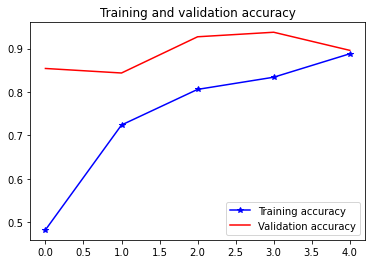

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print(history.history.keys())
epochs=5

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
acc = history.history['acc']
loss = history.history['loss']

plt.plot(range(epochs), acc, 'b*-', label = 'Training accuracy')
plt.plot(range(epochs), val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

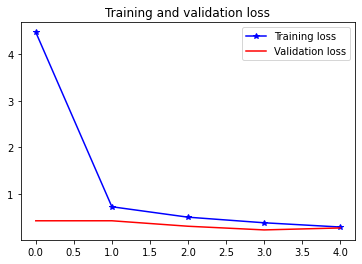

In [6]:
plt.plot(range(epochs), loss, 'b*-', label = 'Training loss')
plt.plot(range(epochs), val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

# 2, Inference

## First, load the trained model, then image to predict

array([[1., 0., 0.]], dtype=float32)

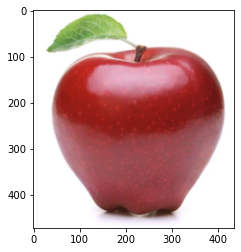

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow import keras

model = keras.models.load_model('fruit.h5')

image_path = './test/Apple/1.png'

image = mpimg.imread(image_path)
plt.imshow(image)

def make_prediction(image_path):
    image = image_utils.load_img(image_path, target_size=(64, 64))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,64,64,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

make_prediction('./test/Apple/1.png')

## It's better to define the mapping for index/name

In [8]:
import numpy as np

image_mapping = {0: 'Apple', 1: 'Banana', 2: 'Orange'}
    
print(image_mapping[np.argmax(make_prediction('./test/Apple/1.png'))])

Apple


## Run the model inference for "test" dataset

In [9]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_it = test_datagen.flow_from_directory('./test/', 
                                       target_size=(64, 64), 
                                       batch_size=1, 
                                       shuffle=False,
                                       class_mode="categorical")

pred_output = model.predict(test_it)
print(pred_output)
pred_output = np.argmax(pred_output, axis=1)
print(pred_output)

Found 96 images belonging to 3 classes.
[[9.9907255e-01 1.4925710e-04 7.7817822e-04]
 [9.9746788e-01 2.3854129e-05 2.5082615e-03]
 [8.5511798e-01 6.7364838e-04 1.4420843e-01]
 [9.9238163e-01 9.6877238e-06 7.6086866e-03]
 [9.7827953e-01 5.6416346e-05 2.1664063e-02]
 [9.9002075e-01 3.9298665e-03 6.0494775e-03]
 [9.9703145e-01 9.8584790e-04 1.9825678e-03]
 [9.9376148e-01 3.6121462e-03 2.6263450e-03]
 [9.9965370e-01 7.6027404e-06 3.3862767e-04]
 [9.0816575e-01 7.2055183e-02 1.9779058e-02]
 [9.3038076e-01 6.7979976e-04 6.8939507e-02]
 [9.9903142e-01 1.4111075e-05 9.5447816e-04]
 [9.9811280e-01 4.8444339e-04 1.4028373e-03]
 [9.8622930e-01 2.4917072e-03 1.1279016e-02]
 [5.6726211e-01 4.0868938e-01 2.4048548e-02]
 [9.9247605e-01 1.5002183e-03 6.0237483e-03]
 [9.9894780e-01 3.0996049e-05 1.0212302e-03]
 [9.2537552e-01 7.2122596e-02 2.5017981e-03]
 [1.6730075e-01 5.4287118e-01 2.8982812e-01]
 [1.1381728e-01 8.8593578e-01 2.4686893e-04]
 [4.9318033e-01 4.7918528e-01 2.7634373e-02]
 [9.9798298e-01

## See the classification report

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_it.classes, pred_output))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.82      1.00      0.90        32
           2       1.00      0.91      0.95        32

    accuracy                           0.93        96
   macro avg       0.94      0.93      0.93        96
weighted avg       0.94      0.93      0.93        96



## See the confusion matrix

Text(0.5, 1.0, 'Confusion matrix of model')

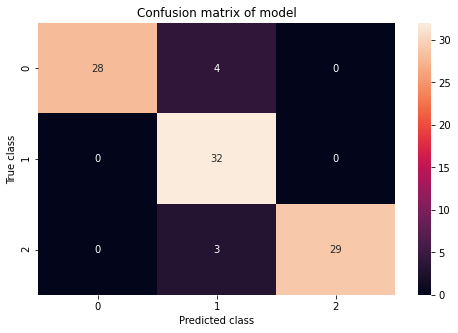

In [11]:
cf_matrix = confusion_matrix(test_it.classes, pred_output)

plt.figure(figsize=(8,5))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')